# Project - Predictive Modeling

### Basic python packages loaded

In [37]:
#Importing all necessary modules
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,accuracy_score


## Problem 1: Linear Regression

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

In [250]:
df_cz=pd.read_csv("cubic_zirconia.csv")

In [251]:
df_cz.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


### Exploratory Data Analysis

In [252]:
# drop the 'Unnamed: 0' column as it is useless for the model
df_cz = df_cz.drop('Unnamed: 0', axis=1)

In [253]:
# Checks the number of rows and columns
row, col = df_cz.shape
print("There are total {}".format(row), "rows and {}".format(col), "columns in the dataset")

There are total 26967 rows and 10 columns in the dataset


In [254]:
df_cz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
carat      26967 non-null float64
cut        26967 non-null object
color      26967 non-null object
clarity    26967 non-null object
depth      26270 non-null float64
table      26967 non-null float64
x          26967 non-null float64
y          26967 non-null float64
z          26967 non-null float64
price      26967 non-null int64
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [255]:
# Checks if any value in the dataframe is null.
a = df_cz.isnull().values.sum()
print("There are {}" .format(a), "null values present in the dataset")

There are 697 null values present in the dataset


#### Imputing missing values

In [256]:
for column in df_cz.columns:
    if df_cz[column].dtype != 'object':
        mean = df_cz[column].mean()
        df_cz[column] = df_cz[column].fillna(mean)    
        
df_cz.isnull().sum()  

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [257]:
# Check for duplicate data
dups = df_cz.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df_cz[dups]

Number of duplicate rows = 34


,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


In [258]:
print('Before',df_cz.shape)
df_cz.drop_duplicates(inplace=True) 
print('After',df_cz.shape)

Before (26967, 10)
After (26933, 10)


In [259]:
dups = df_cz.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [260]:
df_cz.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.798010,0.477237,0.2,0.40,0.70,1.05,4.50
depth,26933.0,61.745282,1.393848,50.8,61.10,61.80,62.50,73.60
table,26933.0,57.455950,2.232156,49.0,56.00,57.00,59.00,79.00
x,26933.0,5.729346,1.127367,0.0,4.71,5.69,6.55,10.23
y,26933.0,5.733102,1.165037,0.0,4.71,5.70,6.54,58.90
z,26933.0,3.537769,0.719964,0.0,2.90,3.52,4.04,31.80
price,26933.0,3937.526120,4022.551862,326.0,945.00,2375.00,5356.00,18818.00


In [261]:
# Getting unique counts of all Ordinal Variables

for column in df_cz[['cut', 'color', 'clarity']]:
    print(column.upper(),': ',df_cz[column].nunique())
    print(df_cz[column].value_counts().sort_values())
    print('\n')

CUT :  5
Fair           780
Good          2435
Very Good     6027
Premium       6886
Ideal        10805
Name: cut, dtype: int64


COLOR :  7
J    1440
I    2765
D    3341
H    4095
F    4723
E    4916
G    5653
Name: color, dtype: int64


CLARITY :  8
I1       364
IF       891
VVS1    1839
VVS2    2530
VS1     4087
SI2     4564
VS2     6093
SI1     6565
Name: clarity, dtype: int64




#### Observation:
- There are no ? or other character present.
- All nominal values have 5 to 8 categories which can be included in dataset for prediction.

### Univariate Analysis:
- Univariate analysis refer to the analysis of a single variable. The main purpose of univariate analysis is to summarize and find patterns in the data. The key point is that there is only one variable involved in the analysis.

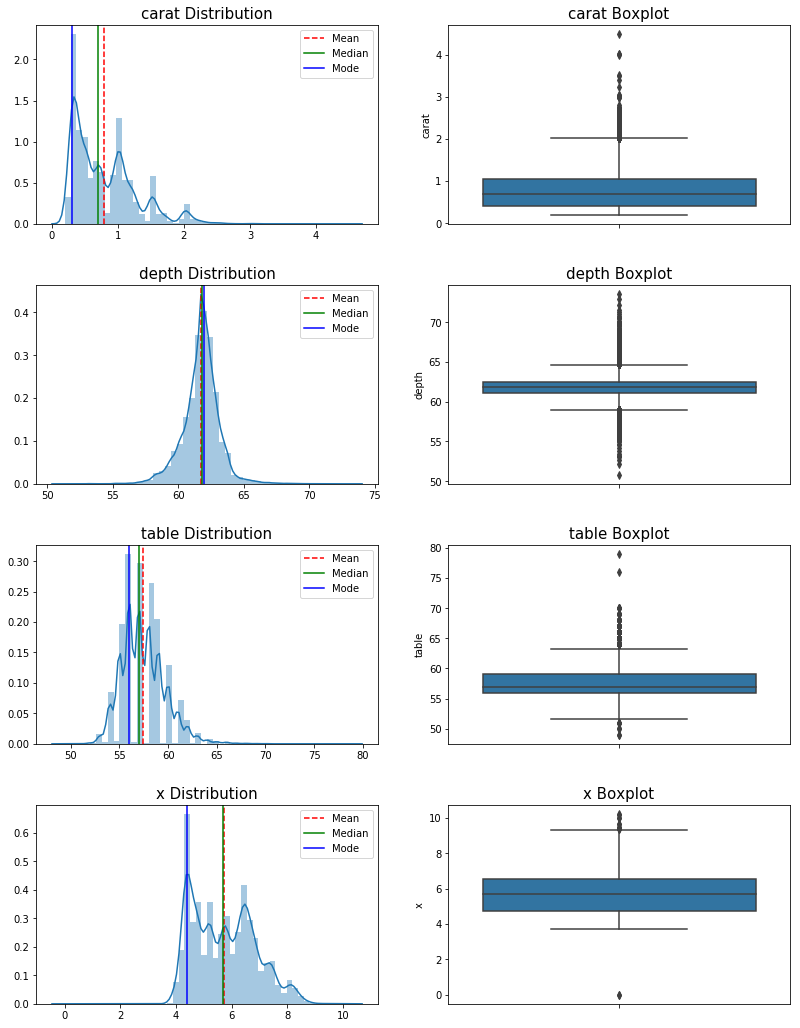

In [262]:
## Univariate analysis for first 4 columns

fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 15)
fig.tight_layout(pad=4.0)

mean=df_cz['carat'].mean()
median=df_cz['carat'].median()
mode=df_cz['carat'].mode().array[0]

a = sns.distplot(df_cz['carat'] , axlabel=False, ax=axes[0][0])
a.set_title("carat Distribution",fontsize=15)
axes[0][0].axvline(mean, color='r', linestyle='--')
axes[0][0].axvline(median, color='g', linestyle='-')
axes[0][0].axvline(mode, color='b', linestyle='-')
axes[0][0].legend({'Mean':mean,'Median':median,'Mode':mode})

a = sns.boxplot(df_cz['carat'], orient = "v" , ax=axes[0][1])
a.set_title("carat Boxplot",fontsize=15)

mean1=df_cz['depth'].mean()
median1=df_cz['depth'].median()
mode1=df_cz['depth'].mode().array[0]

a = sns.distplot(df_cz['depth'] , axlabel=False, ax=axes[1][0])
a.set_title("depth Distribution",fontsize=15)
axes[1][0].axvline(mean1, color='r', linestyle='--')
axes[1][0].axvline(median1, color='g', linestyle='-')
axes[1][0].axvline(mode1, color='b', linestyle='-')
axes[1][0].legend({'Mean':mean1,'Median':median1,'Mode':mode1})

a = sns.boxplot(df_cz['depth'] , orient = "v" , ax=axes[1][1])
a.set_title("depth Boxplot",fontsize=15)

mean2=df_cz['table'].mean()
median2=df_cz['table'].median()
mode2=df_cz['table'].mode().array[0]

a = sns.distplot(df_cz['table'] , axlabel=False, ax=axes[2][0])
a.set_title("table Distribution",fontsize=15)
axes[2][0].axvline(mean2, color='r', linestyle='--')
axes[2][0].axvline(median2, color='g', linestyle='-')
axes[2][0].axvline(mode2, color='b', linestyle='-')
axes[2][0].legend({'Mean':mean2,'Median':median2,'Mode':mode2})

a = sns.boxplot(df_cz['table'] , orient = "v" , ax=axes[2][1])
a.set_title("table Boxplot",fontsize=15)

mean3=df_cz['x'].mean()
median3=df_cz['x'].median()
mode3=df_cz['x'].mode().array[0]

a = sns.distplot(df_cz['x'] , axlabel=False, ax=axes[3][0])
a.set_title("x Distribution",fontsize=15)
axes[3][0].axvline(mean3, color='r', linestyle='--')
axes[3][0].axvline(median3, color='g', linestyle='-')
axes[3][0].axvline(mode3, color='b', linestyle='-')
axes[3][0].legend({'Mean':mean3,'Median':median3,'Mode':mode3})

a = sns.boxplot(df_cz['x'] , orient = "v" , ax=axes[3][1])
a.set_title("x Boxplot",fontsize=15)

plt.show()

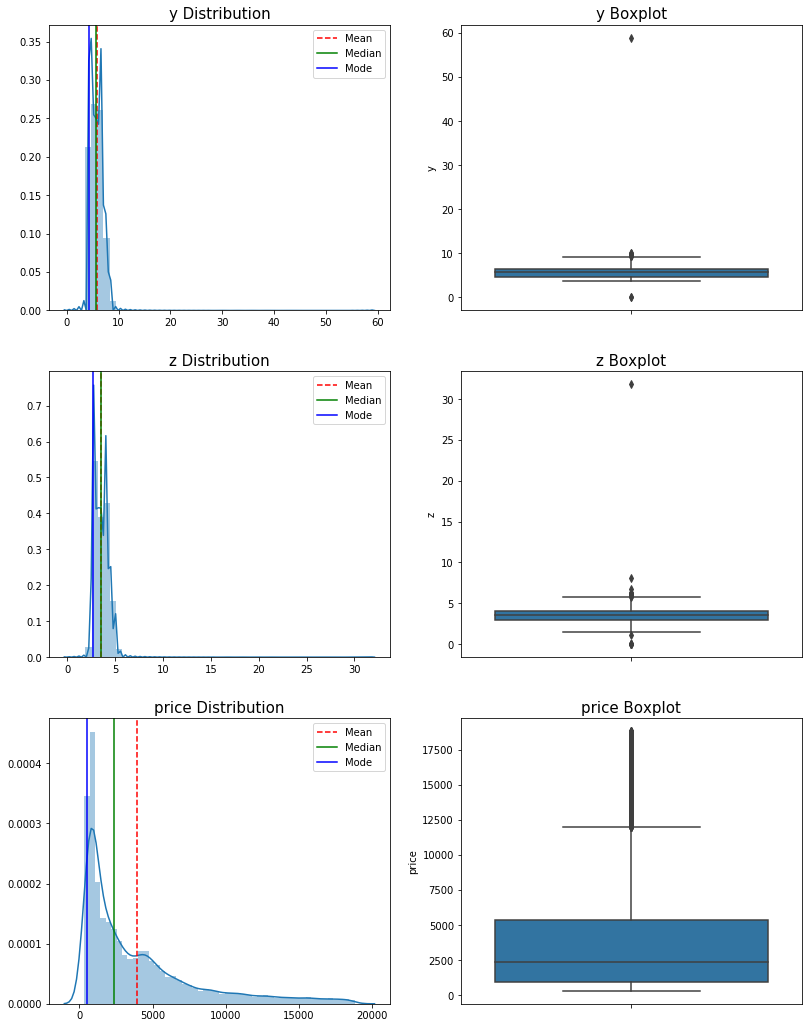

In [263]:
## Univariate analysis for next 3 columns

fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12, 15)
fig.tight_layout(pad=4.0)

mean=df_cz['y'].mean()
median=df_cz['y'].median()
mode=df_cz['y'].mode().array[0]

a = sns.distplot(df_cz['y'] , axlabel=False, ax=axes[0][0])
a.set_title("y Distribution",fontsize=15)
axes[0][0].axvline(mean, color='r', linestyle='--')
axes[0][0].axvline(median, color='g', linestyle='-')
axes[0][0].axvline(mode, color='b', linestyle='-')
axes[0][0].legend({'Mean':mean,'Median':median,'Mode':mode})

a = sns.boxplot(df_cz['y'], orient = "v" , ax=axes[0][1])
a.set_title("y Boxplot",fontsize=15)

mean1=df_cz['z'].mean()
median1=df_cz['z'].median()
mode1=df_cz['z'].mode().array[0]

a = sns.distplot(df_cz['z'] , axlabel=False, ax=axes[1][0])
a.set_title("z Distribution",fontsize=15)
axes[1][0].axvline(mean1, color='r', linestyle='--')
axes[1][0].axvline(median1, color='g', linestyle='-')
axes[1][0].axvline(mode1, color='b', linestyle='-')
axes[1][0].legend({'Mean':mean1,'Median':median1,'Mode':mode1})

a = sns.boxplot(df_cz['z'] , orient = "v" , ax=axes[1][1])
a.set_title("z Boxplot",fontsize=15)

mean2=df_cz['price'].mean()
median2=df_cz['price'].median()
mode2=df_cz['price'].mode().array[0]

a = sns.distplot(df_cz['price'] , axlabel=False, ax=axes[2][0])
a.set_title("price Distribution",fontsize=15)
axes[2][0].axvline(mean2, color='r', linestyle='--')
axes[2][0].axvline(median2, color='g', linestyle='-')
axes[2][0].axvline(mode2, color='b', linestyle='-')
axes[2][0].legend({'Mean':mean2,'Median':median2,'Mode':mode2})

a = sns.boxplot(df_cz['price'] , orient = "v" , ax=axes[2][1])
a.set_title("price Boxplot",fontsize=15)

plt.show()

In [264]:
from scipy.stats import skew 
df_cz.skew()   # to measure the skeweness of every attribute

carat    1.114789
depth   -0.026422
table    0.765805
x        0.392290
y        3.867764
z        2.580665
price    1.619116
dtype: float64

#### Inferences:
- The skewness value of 3.8 shows that the variable 'y' has a right-skewed distribution, indicating the presence of extreme higher values. The maximum 'y' value of 58.9 proves this point.
- Variables 'depth','table' and 'x' seems to be normally distributed.

### Bivariate Analysis:

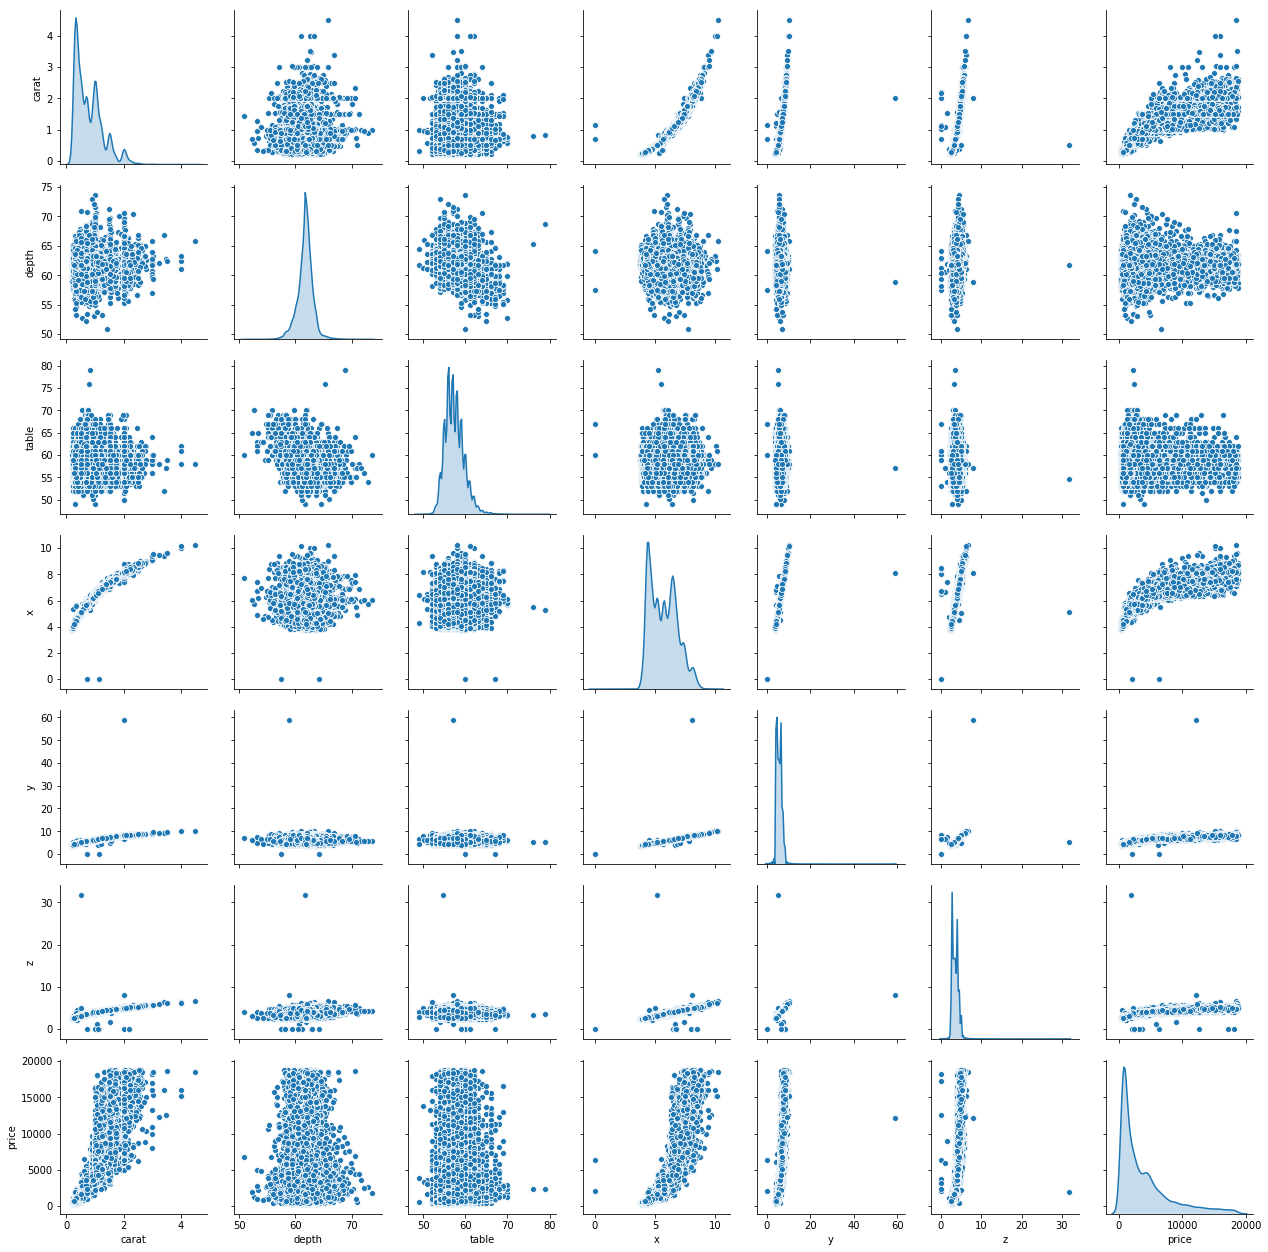

In [265]:
df_cz = df_cz.iloc[:, 0:10]
sns.pairplot(df_cz, diag_kind='kde')   # to plot density curve instead of histogram

#### The pair plot only offers visual information about the degree of correlation. In order to obtain more precise information we can use the inbuilt .corr() method in Pandas. This returns a table with all the correlations calculated for the numerical columns.

In [266]:
df_cz.corr() 

,carat,depth,table,x,y,z,price
carat,1.000000,0.034741,0.181539,0.976858,0.941442,0.940982,0.922409
depth,0.034741,1.000000,-0.293720,-0.018145,-0.024139,0.097659,-0.002855
table,0.181539,-0.293720,1.000000,0.196254,0.182352,0.148994,0.126844
x,0.976858,-0.018145,0.196254,1.000000,0.962601,0.956490,0.886554
y,0.941442,-0.024139,0.182352,0.962601,1.000000,0.928725,0.856441
z,0.940982,0.097659,0.148994,0.956490,0.928725,1.000000,0.850682
price,0.922409,-0.002855,0.126844,0.886554,0.856441,0.850682,1.000000


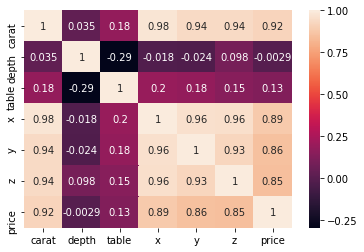

In [267]:
sns.heatmap(df_cz.corr(), annot=True)  # plot the correlation coefficients as a heatmap

### Inferences:
- 'Price' (response variable) is highly correlated to 'carat','x','y' and 'z' which are predictors. This indicates that independent variables influence the dependent variable.
- Also 'x', 'y' and 'z' are highly correlated to each other. 
- Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.
- Multicollinearity is a problem because it undermines the statistical significance of an independent variable. Other things being equal, the larger the standard error of a regression coefficient, the less likely it is that this coefficient will be statistically significant.

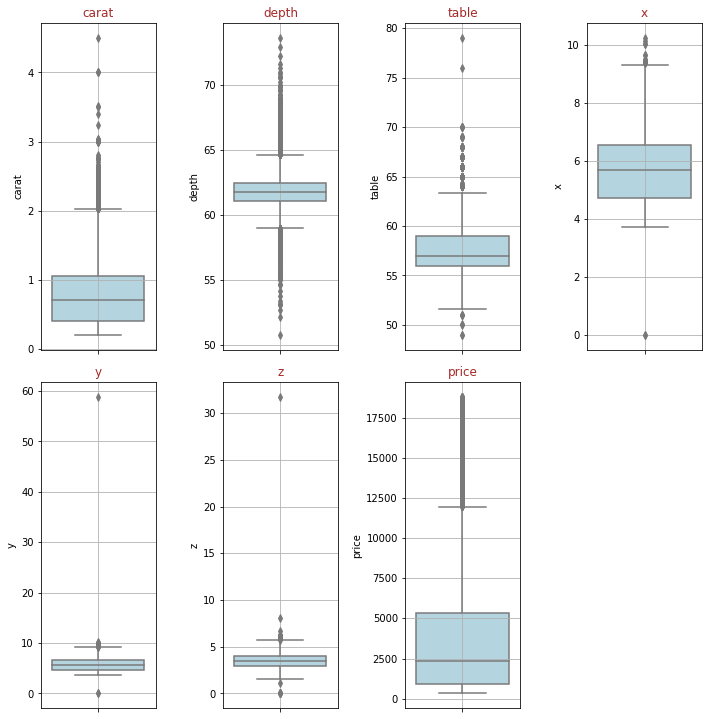

In [268]:
# construct box plot for continuous variables before Outlier Removal
cont=df_cz.dtypes[(df_cz.dtypes=='int64')|(df_cz.dtypes=='float64')].index

data_plot=df_cz[cont]
fig=plt.figure(figsize=(10,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]],color='Lightblue')
    ax.set_title(data_plot.columns[i],color='Brown')
    plt.grid()
    
plt.tight_layout()

In [269]:
# Outlier treatment :  define a custom function- If for a particular column the max value is greater than that assign max value,same logic for min value

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range


#### All the outliers are replaced by the low and high value of IQR which is nothing but one type of outlier treatment.

In [270]:
for column in df_cz[cont].columns:
    lr,ur=remove_outlier(df_cz[column])
    df_cz[column]=np.where(df_cz[column]>ur,ur,df_cz[column])
    df_cz[column]=np.where(df_cz[column]<lr,lr,df_cz[column])

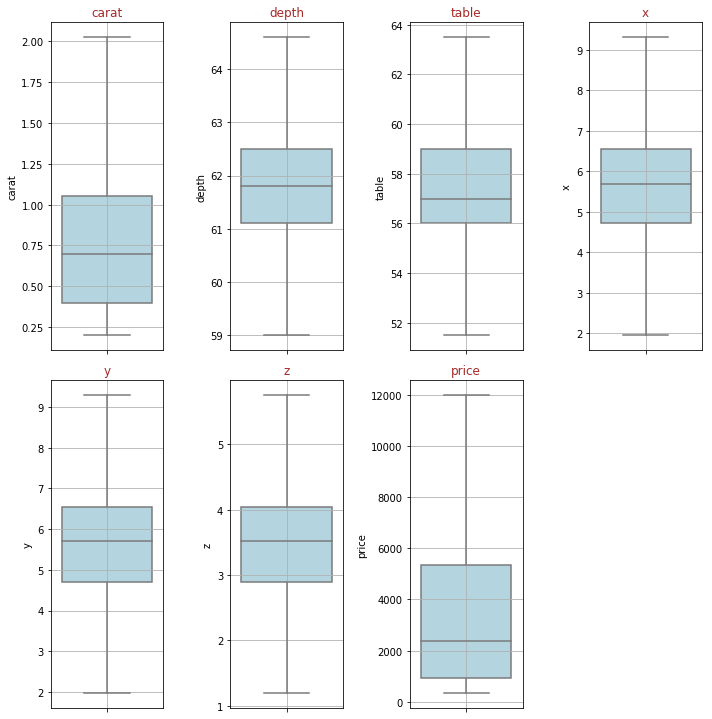

In [271]:
# construct box plot for continuous variables after Outlier Removal
cont=df_cz.dtypes[(df_cz.dtypes=='int64')|(df_cz.dtypes=='float64')].index

data_plot=df_cz[cont]
fig=plt.figure(figsize=(10,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]],color='Lightblue')
    ax.set_title(data_plot.columns[i],color='Brown')
    plt.grid()
    
plt.tight_layout()

### Label encoding 

The cut, color and clarity variable are ordinal i.e. there is an order within the different categories hence, label encoding is preferred.

In [272]:
#Method 1:
df_cz['cut']=np.where(df_cz['cut'] =='Fair', '0',df_cz['cut'])
df_cz['cut']=np.where(df_cz['cut'] =='Good', '1', df_cz['cut'])
df_cz['cut']=np.where(df_cz['cut'] =='Very Good', '2', df_cz['cut'])
df_cz['cut']=np.where(df_cz['cut'] =='Premium', '3', df_cz['cut'])
df_cz['cut']=np.where(df_cz['cut'] =='Ideal', '4', df_cz['cut'])

In [273]:
df_cz['color']=np.where(df_cz['color'] =='J', '0',df_cz['color'])
df_cz['color']=np.where(df_cz['color'] =='I', '1', df_cz['color'])
df_cz['color']=np.where(df_cz['color'] =='H', '2', df_cz['color'])
df_cz['color']=np.where(df_cz['color'] =='G', '3', df_cz['color'])
df_cz['color']=np.where(df_cz['color'] =='F', '4', df_cz['color'])
df_cz['color']=np.where(df_cz['color'] =='E', '5', df_cz['color'])
df_cz['color']=np.where(df_cz['color'] =='D', '6', df_cz['color'])

In [274]:
df_cz['clarity']=np.where(df_cz['clarity'] =='I1', '0',df_cz['clarity'])
df_cz['clarity']=np.where(df_cz['clarity'] =='SI2', '1', df_cz['clarity'])
df_cz['clarity']=np.where(df_cz['clarity'] =='SI1', '2', df_cz['clarity'])
df_cz['clarity']=np.where(df_cz['clarity'] =='VS2', '3', df_cz['clarity'])
df_cz['clarity']=np.where(df_cz['clarity'] =='VS1', '4', df_cz['clarity'])
df_cz['clarity']=np.where(df_cz['clarity'] =='VVS2', '5', df_cz['clarity'])
df_cz['clarity']=np.where(df_cz['clarity'] =='VVS1', '6', df_cz['clarity'])
df_cz['clarity']=np.where(df_cz['clarity'] =='IF', '7', df_cz['clarity'])

In [275]:
#Method 2

#Converting Object data type into Categorical
#for feature in df_cz.columns: 
 #   if df_cz[feature].dtype == 'object': 
  #      print('\n')
   #     print('feature:',feature)
    #    print(pd.Categorical(df_cz[feature].unique()))
     #   print(pd.Categorical(df_cz[feature].unique()).codes)
      #  df_cz[feature] = pd.Categorical(df_cz[feature]).codes

In [276]:
#Checking teh dataset after converting Object data type into Categorical
df_cz.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4,5,2,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,3,3,7,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,2,5,5,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,4,4,4,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,4,4,6,60.4,59.0,4.35,4.43,2.65,779.0


### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

In [277]:
df_cz.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [278]:
 0 in df_cz.values

False

In [279]:
df_cz.isin([0]).sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

### Inference:
There are zero values in 'cut', 'color' and 'clarity' variable. But these are assigned while converting the categorical variable to numeric. Hence it has meaning and need not be deleted.

In [280]:
df_cz.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.793298,0.462127,0.200,0.40,0.70,1.05,2.025
depth,26933.0,61.749043,1.218503,59.000,61.10,61.80,62.50,64.600
table,26933.0,57.435544,2.157119,51.500,56.00,57.00,59.00,63.500
x,26933.0,5.729323,1.126175,1.950,4.71,5.69,6.55,9.310
y,26933.0,5.731255,1.118155,1.965,4.71,5.70,6.54,9.285
z,26933.0,3.536928,0.696753,1.190,2.90,3.52,4.04,5.750
price,26933.0,3735.832213,3468.207359,326.000,945.00,2375.00,5356.00,11972.500


In [281]:
df_cz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
carat      26933 non-null float64
cut        26933 non-null object
color      26933 non-null object
clarity    26933 non-null object
depth      26933 non-null float64
table      26933 non-null float64
x          26933 non-null float64
y          26933 non-null float64
z          26933 non-null float64
price      26933 non-null float64
dtypes: float64(7), object(3)
memory usage: 3.5+ MB


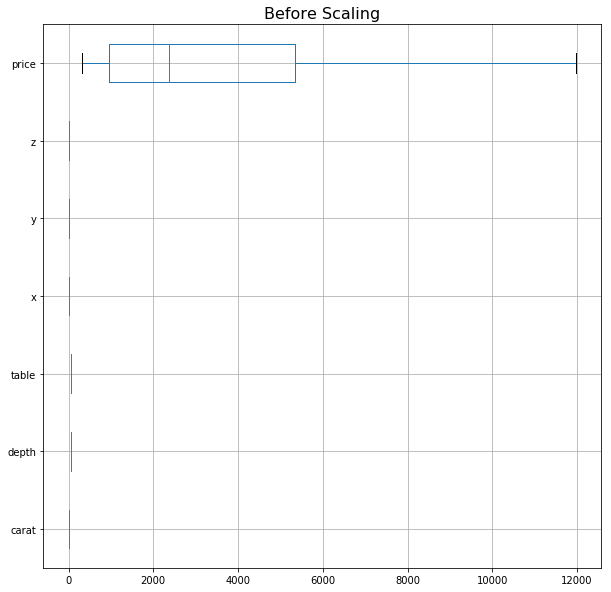

In [282]:
# construct box plot for continuous variables
cont=df_cz.dtypes[(df_cz.dtypes=='int64')|(df_cz.dtypes=='float64')].index
plt.figure(figsize=(10,10))
df_cz[cont].boxplot(vert=0)
plt.title('Before Scaling',fontsize=16)
plt.show()

In [283]:
#Feature Scaling using MinMaxScaler that normalizes the data using the formula (x - min)/(max - min)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_df = min_max_scaler.fit_transform(df_cz)
print(scaled_df)

[[0.05479452 1.         0.83333333 ... 0.31762295 0.32236842 0.01485425]
 [0.07123288 0.75       0.5        ... 0.34084699 0.33114035 0.05649766]
 [0.38356164 0.5        0.83333333 ... 0.56762295 0.56798246 0.51199931]
 ...
 [0.16986301 0.75       0.83333333 ... 0.43510929 0.43421053 0.1141974 ]
 [0.03835616 0.5        0.66666667 ... 0.30532787 0.30921053 0.03056712]
 [0.57534247 0.75       0.         ... 0.67144809 0.6754386  0.41557549]]


### Inference:
- Scaling is done only to make the intercept 0 in case where the intercept value has no meaning.

#### Now that we have scaled the data. Let us create a dataframe out of this scaled variables.

In [284]:
scaled_df = pd.DataFrame(scaled_df, index=df_cz.index, columns=df_cz.columns)
scaled_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.054795,1.00,0.833333,0.285714,0.553571,0.541667,0.315217,0.317623,0.322368,0.014854
1,0.071233,0.75,0.500000,1.000000,0.321429,0.541667,0.335598,0.340847,0.331140,0.056498
2,0.383562,0.50,0.833333,0.714286,0.571429,0.708333,0.555707,0.567623,0.567982,0.511999
3,0.120548,1.00,0.666667,0.571429,0.464286,0.375000,0.389946,0.387295,0.388158,0.064912
4,0.060274,1.00,0.666667,0.857143,0.250000,0.625000,0.326087,0.336749,0.320175,0.038896


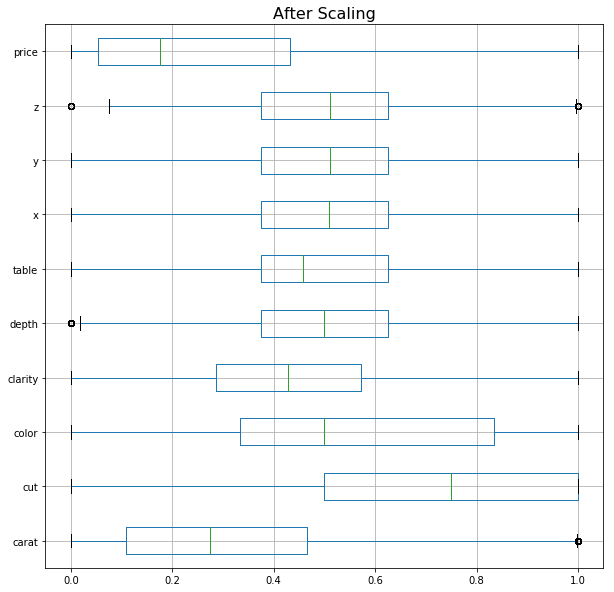

In [285]:
# construct box plot for continuous variables
cont=scaled_df.dtypes[(scaled_df.dtypes=='int64')|(scaled_df.dtypes=='float64')].index
plt.figure(figsize=(10,10))
scaled_df[cont].boxplot(vert=0)
plt.title('After Scaling',fontsize=16)
plt.show()

### Inferences:
- From the above boxplots we can see that most of the outliers were removed after outlier treatment.
- After scaling it is much cleaner. 
- If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.
- Min-Max Normalization: This technique re-scales a feature or observation value with distribution value between 0 and 1.
- Scaling is a good practice and it improves the model.

In [286]:
scaled_df.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26933.000000,26933.000000,26933.000000,26933.000000,26933.00000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.325095,0.727425,0.565799,0.436225,0.49090,0.494629,0.513495,0.514516,0.514677,0.292777
std,0.253220,0.278291,0.284314,0.235250,0.21759,0.179760,0.153013,0.152753,0.152797,0.297790
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.109589,0.500000,0.333333,0.285714,0.37500,0.375000,0.375000,0.375000,0.375000,0.053149
50%,0.273973,0.750000,0.500000,0.428571,0.50000,0.458333,0.508152,0.510246,0.510965,0.175933
75%,0.465753,1.000000,0.833333,0.571429,0.62500,0.625000,0.625000,0.625000,0.625000,0.431889
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


### 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

### Train-Test Split

In [287]:
# Copy all the predictor variables into X dataframe
X = scaled_df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = scaled_df[['price']]

In [288]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.054795,1.00,0.833333,0.285714,0.553571,0.541667,0.315217,0.317623,0.322368
1,0.071233,0.75,0.500000,1.000000,0.321429,0.541667,0.335598,0.340847,0.331140
2,0.383562,0.50,0.833333,0.714286,0.571429,0.708333,0.555707,0.567623,0.567982
3,0.120548,1.00,0.666667,0.571429,0.464286,0.375000,0.389946,0.387295,0.388158
4,0.060274,1.00,0.666667,0.857143,0.250000,0.625000,0.326087,0.336749,0.320175


In [289]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,33.3,carat
1,10.0,cut
2,5.4,color
3,5.0,clarity
4,13.2,depth
5,11.3,table
6,4635.3,x
7,4469.1,y
8,1279.0,z


### Inference:
- VIF value for color is between 1 and 5 so, there is a moderate correlation, but it is not severe enough to warrant corrective measures.
-  VIF value for rest all the variable is greater than 5 which, represents critical levels of multicollinearity where the coefficients are poorly estimated and the p value are questionable.
- As expected, the x, y, z and the carat of the cubic zirconia have a high variance inflation factor because they "explain" the same variance within this dataset. We would need to discard few of these variables step by step before moving on to model building or risk building a model with high multicolinearity.

In [290]:
#Step 1: Discarding x attribute
X = X.drop('x', axis=1)

In [291]:
X.head()

,carat,cut,color,clarity,depth,table,y,z
0,0.054795,1.00,0.833333,0.285714,0.553571,0.541667,0.317623,0.322368
1,0.071233,0.75,0.500000,1.000000,0.321429,0.541667,0.340847,0.331140
2,0.383562,0.50,0.833333,0.714286,0.571429,0.708333,0.567623,0.567982
3,0.120548,1.00,0.666667,0.571429,0.464286,0.375000,0.387295,0.388158
4,0.060274,1.00,0.666667,0.857143,0.250000,0.625000,0.336749,0.320175


In [292]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,32.6,carat
1,9.7,cut
2,5.4,color
3,4.9,clarity
4,13.1,depth
5,10.8,table
6,1090.4,y
7,1208.6,z


In [293]:
#Step 2: Discarding z attribute
X = X.drop('z', axis=1)

In [294]:
X.head()

,carat,cut,color,clarity,depth,table,y
0,0.054795,1.00,0.833333,0.285714,0.553571,0.541667,0.317623
1,0.071233,0.75,0.500000,1.000000,0.321429,0.541667,0.340847
2,0.383562,0.50,0.833333,0.714286,0.571429,0.708333,0.567623
3,0.120548,1.00,0.666667,0.571429,0.464286,0.375000,0.387295
4,0.060274,1.00,0.666667,0.857143,0.250000,0.625000,0.336749


In [295]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,30.6,carat
1,9.7,cut
2,5.4,color
3,4.9,clarity
4,5.8,depth
5,10.8,table
6,112.4,y


In [296]:
#Step 3: Discarding carat attribute
X = X.drop('carat', axis=1)

In [297]:
X.head()

,cut,color,clarity,depth,table,y
0,1.00,0.833333,0.285714,0.553571,0.541667,0.317623
1,0.75,0.500000,1.000000,0.321429,0.541667,0.340847
2,0.50,0.833333,0.714286,0.571429,0.708333,0.567623
3,1.00,0.666667,0.571429,0.464286,0.375000,0.387295
4,1.00,0.666667,0.857143,0.250000,0.625000,0.336749


In [298]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,7.2,cut
1,4.6,color
2,4.5,clarity
3,5.1,depth
4,8.2,table
5,11.7,y


### Inference: 
- Finally all the attribute's VIF value are less or equal to 10. Hence we can go forward with building the model using the remaining attributes 

In [299]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

### Linear Regression Model¶

In [300]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [301]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cut is 0.04363802887493747
The coefficient for color is 0.11963746843288983
The coefficient for clarity is 0.2860697310114946
The coefficient for depth is 0.07595309933802072
The coefficient for table is 0.015747552383059277
The coefficient for y is 2.0169263462517972


In [302]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1.0143926868821223


In [303]:
# R square on training data
print('The coefficient of determination R^2 of the prediction on Train set',regression_model.score(X_train, y_train))

The coefficient of determination R^2 of the prediction on Train set 0.8876692651510796


#### 88.7% of the variation in the price is explained by the predictors in the model for train set

In [305]:
# R square on testing data
print('The coefficient of determination R^2 of the prediction on Test set',regression_model.score(X_test, y_test))

The coefficient of determination R^2 of the prediction on Test set 0.8880185460742231


#### 88.8% of the variation in the price is explained by the predictors in the model for test set

In [306]:
#RMSE on Training data
from sklearn.metrics import mean_squared_error
from math import sqrt

print("The Root Mean Square Error (RMSE) of the model is for training set is",np.sqrt(mean_squared_error(y_train,regression_model.predict(X_train))))


The Root Mean Square Error (RMSE) of the model is for training set is 0.0997324818701998


In [307]:
#RMSE on Testing data

print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(mean_squared_error(y_test,regression_model.predict(X_test))))

The Root Mean Square Error (RMSE) of the model is for testing set is 0.09981734535378116


### Linear Regression using statsmodels
- R^2 value for training and test set are equal to 88.8% which is good.
- R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2.
- Scikit does not provide a facility for adjusted R^2... so we use statsmodel, a library that gives results similar to what you obtain in R language
- This library expects the X and Y to be given in one single dataframe

In [308]:
#Train
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,cut,color,clarity,depth,table,y,price
22114,0.50,0.333333,0.428571,0.607143,0.708333,0.338115,0.018117
2275,1.00,0.833333,0.428571,0.392857,0.291667,0.320355,0.044477
19183,1.00,0.500000,0.285714,0.625000,0.458333,0.421448,0.078479
5030,0.25,0.833333,0.142857,0.767857,0.375000,0.630464,0.321041
25414,0.75,0.666667,0.142857,0.375000,0.875000,0.618169,0.320354


In [309]:
#Test
data_test = pd.concat([X_test, y_test], axis=1)
data_test.head()

,cut,color,clarity,depth,table,y,price
16997,0.75,0.166667,0.285714,0.267857,0.875000,0.676913,0.426394
24457,0.50,0.500000,0.428571,0.000000,0.625000,0.600410,0.357017
16612,1.00,0.666667,0.571429,0.107143,0.458333,0.717896,0.972223
308,0.25,0.500000,0.571429,0.821429,0.458333,0.541667,0.256729
26652,0.50,0.000000,0.428571,0.321429,0.875000,0.840847,1.000000


In [310]:
expr= 'price ~ cut + color + clarity + depth + table + y '

In [311]:
import statsmodels.formula.api as smf

lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept   -1.014393
cut          0.043638
color        0.119637
clarity      0.286070
depth        0.075953
table        0.015748
y            2.016926
dtype: float64

In [312]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                 2.482e+04
Date:                Sun, 05 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:19:51   Log-Likelihood:                 16710.
No. Observations:               18853   AIC:                        -3.341e+04
Df Residuals:                   18846   BIC:                        -3.335e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0144      0.007   -146.171      0.0

#### Inference:
- The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0. 

In [313]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

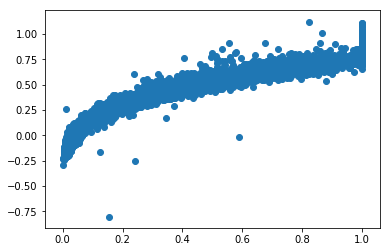

In [314]:
plt.scatter(y_test['price'], y_pred)
plt.show()

##### Inference:
- A good model's prediction will be close to actual leading to high R and R2 values

In [315]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-1.01) * Intercept + (0.04) * cut + (0.12) * color + (0.29) * clarity + (0.08) * depth + (0.02) * table + (2.02) * y + 

### 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

### Inference:

- In other words, the p-value for a variable is less than the significance level, then the sample data provide enough evidence to reject the null hypothesis for the entire population. Hence the data favor the hypothesis that there is a non-zero correlation. Changes in the independent variable are associated with changes in the response at the population level. This variable is statistically significant and probably a worthwhile addition to the regression model.

#### The final Linear Regression equation is

- price = b0 + b1 * cut + b2 * color + b3 * clarity + b4 * depth + b5 * table + b6 * y  

- price = (-1.01) * Intercept + (0.04) * cut + (0.12) * color + (0.29) * clarity + (0.08) * depth + (0.02) * table + (2.02) * y 

- All coeficients are positive. 
- When 'y' increases by 1 unit, 'price' increases by 2.02 units, keeping all other predictors constant.
- Similarly, when 'depth' increases by 1 unit, 'price' increases by 0.08 units, keeping all other predictors constant.

### Recommendations:

#### Higher profitable stones can be identified by predicting the price for the stone on the bases the 5 important attributes.

The best 5 attributes that are most important are:
- y (Width)
- clarity 
- color
- depth
- cut

- All five attributes (y, clarity, color, depth and cut) will contribute positively to the price.
- If the width, clarity, color, depth and the cut style of the cubic zirconia is high then the price is high.

If only the dependent/response variable is log-transformed. 

Exponentiating the coefficient, and subtracting one from this number, and multiplying by 100. This gives the percent increase (or decrease) in the response for every one-unit increase in the independent variable. 

- Example: 
- The coefficient is 0.29 
        (exp(0.29) – 1) * 100 = 33.6 ~ 34%.

For every one-unit increase in the independent variable (color), our dependent variable (price) increases by about 34%.

- The coefficient is 0.12 
        (exp(0.12) – 1) * 100 = 12.7 ~ 13%.
        
For every one-unit increase in the independent variable (z), our dependent variable (price) decreases by about 13%. 

## Problem 2: Logistic Regression and LDA

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.


### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

#### Inspect the data

In [182]:
df_hp=pd.read_csv("Holiday_Package.csv")

In [183]:
df_hp.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


### Exploratory Data Analysis

In [184]:
df_hp.rename(columns = {'Holliday_Package':'Holiday_Package'}, inplace = True) 

In [185]:
# Checks the number of rows and columns
row, col = df_hp.shape
print("There are total {}".format(row), "rows and {}".format(col), "columns in the dataset")

There are total 872 rows and 8 columns in the dataset


In [186]:
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
Unnamed: 0           872 non-null int64
Holiday_Package      872 non-null object
Salary               872 non-null int64
age                  872 non-null int64
educ                 872 non-null int64
no_young_children    872 non-null int64
no_older_children    872 non-null int64
foreign              872 non-null object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [187]:
# Checks if any value in the dataframe is null.
a = df_hp.isnull().values.sum()
print("There are {}" .format(a), "null values present  in the dataset")

There are 0 null values present  in the dataset


In [188]:
# drop the 'Unnamed: 0' column as it is useless for the model
df_hp = df_hp.drop('Unnamed: 0', axis=1)

In [189]:
# Check for duplicate data
dups = df_hp.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df_hp[dups]

Number of duplicate rows = 0


,Holiday_Package,Salary,age,educ,no_young_children,no_older_children,foreign


In [190]:
df_hp.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


In [191]:
# Getting unique counts of all Ordinal Variables

for column in df_hp[['Holiday_Package', 'foreign']]:
    print(column.upper(),': ',df_hp[column].nunique())
    print(df_hp[column].value_counts().sort_values())
    print('\n')

HOLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holiday_Package, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




#### Observation:
- There are no ? or other charecter present.
- All nominal values have 2 categories which can be included in dataset for prediction.

#### Convert Object Feature types for Linear Discriminant Analysis

In [192]:
#Converting Object data type into Categorical
for feature in df_hp.columns: 
    if df_hp[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df_hp[feature].unique()))
        print(pd.Categorical(df_hp[feature].unique()).codes)
        df_hp[feature] = pd.Categorical(df_hp[feature]).codes



feature: Holiday_Package
[no, yes]
Categories (2, object): [no, yes]
[0 1]


feature: foreign
[no, yes]
Categories (2, object): [no, yes]
[0 1]


### Proportion in the Target classes

In [193]:
df_hp['Holiday_Package'].value_counts()

0    471
1    401
Name: Holiday_Package, dtype: int64

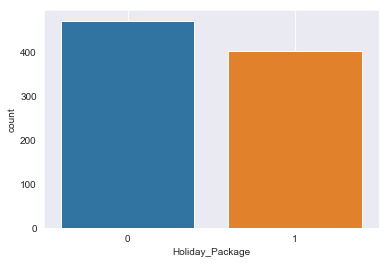

In [194]:
sns.countplot(df_hp.Holiday_Package)
plt.grid()
plt.show()

In [195]:
#Now that we know the distribution of Ones and Zeroes, let us go ahead and check the percentage of Ones and Zeroes.
print ('The percentage of zeroes in the Holiday_Package variable is',(df_hp['Holiday_Package'].value_counts()[0]/len(df_hp['Holiday_Package']))*100,
       '\n',
      'and the percentage of ones in the Holiday_Package variable is',(df_hp['Holiday_Package'].value_counts()[1]/len(df_hp['Holiday_Package']))*100)

The percentage of zeroes in the Holiday_Package variable is 54.01376146788991 
 and the percentage of ones in the Holiday_Package variable is 45.98623853211009


### Univariate Analysis:
Univariate analysis refer to the analysis of a single variable. The main purpose of univariate analysis is to summarize and find patterns in the data. The key point is that there is only one variable involved in the analysis.


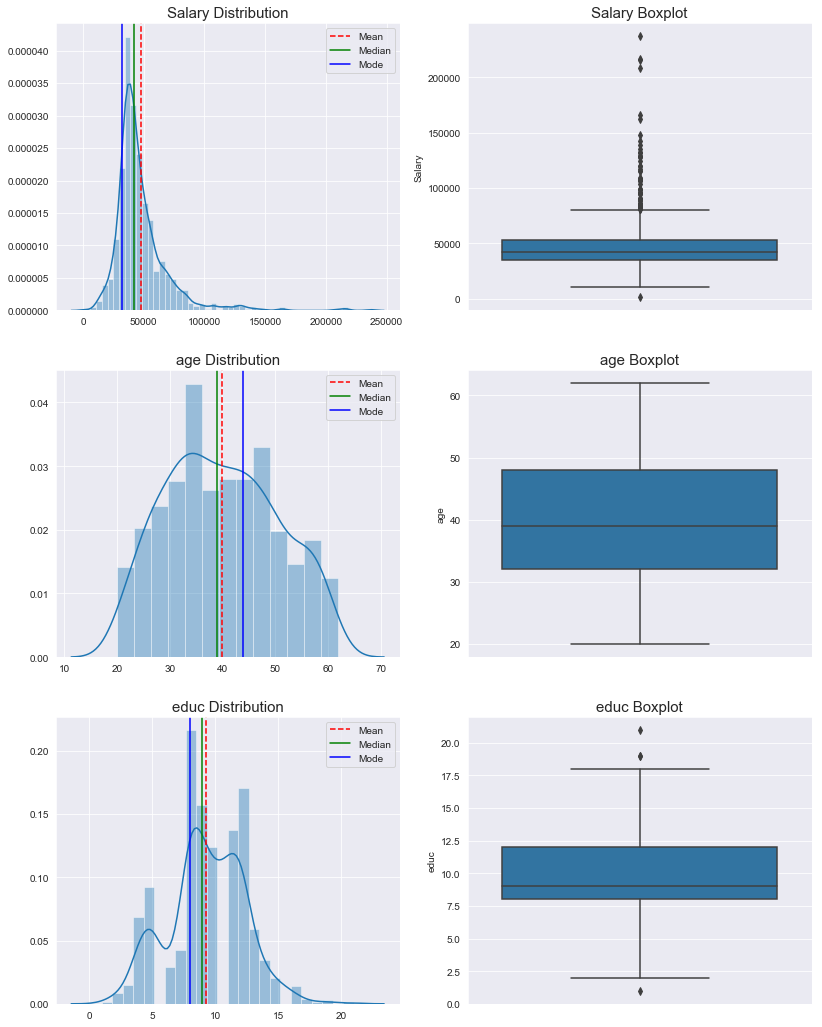

In [196]:
## Univariate analysis for continuous variables

fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12, 15)
fig.tight_layout(pad=4.0)

mean=df_hp['Salary'].mean()
median=df_hp['Salary'].median()
mode=df_hp['Salary'].mode().array[0]

a = sns.distplot(df_hp['Salary'] , axlabel=False, ax=axes[0][0])
a.set_title("Salary Distribution",fontsize=15)
axes[0][0].axvline(mean, color='r', linestyle='--')
axes[0][0].axvline(median, color='g', linestyle='-')
axes[0][0].axvline(mode, color='b', linestyle='-')
axes[0][0].legend({'Mean':mean,'Median':median,'Mode':mode})

a = sns.boxplot(df_hp['Salary'], orient = "v" , ax=axes[0][1])
a.set_title("Salary Boxplot",fontsize=15)

mean1=df_hp['age'].mean()
median1=df_hp['age'].median()
mode1=df_hp['age'].mode().array[0]

a = sns.distplot(df_hp['age'] , axlabel=False, ax=axes[1][0])
a.set_title("age Distribution",fontsize=15)
axes[1][0].axvline(mean1, color='r', linestyle='--')
axes[1][0].axvline(median1, color='g', linestyle='-')
axes[1][0].axvline(mode1, color='b', linestyle='-')
axes[1][0].legend({'Mean':mean1,'Median':median1,'Mode':mode1})

a = sns.boxplot(df_hp['age'] , orient = "v" , ax=axes[1][1])
a.set_title("age Boxplot",fontsize=15)

mean2=df_hp['educ'].mean()
median2=df_hp['educ'].median()
mode2=df_hp['educ'].mode().array[0]

a = sns.distplot(df_hp['educ'] , axlabel=False, ax=axes[2][0])
a.set_title("educ Distribution",fontsize=15)
axes[2][0].axvline(mean2, color='r', linestyle='--')
axes[2][0].axvline(median2, color='g', linestyle='-')
axes[2][0].axvline(mode2, color='b', linestyle='-')
axes[2][0].legend({'Mean':mean2,'Median':median2,'Mode':mode2})

a = sns.boxplot(df_hp['educ'] , orient = "v" , ax=axes[2][1])
a.set_title("educ Boxplot",fontsize=15)

plt.show()

In [197]:
from scipy.stats import skew 
df_hp.skew()   # to measure the skeweness of every attribute

Holiday_Package      0.161348
Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
foreign              1.170906
dtype: float64

#### Inferences:
- The skewness value of 3.1 shows that the variable 'Salary' has a right-skewed distribution, indicating the presence of extreme higher values. The maximum 'Salary' value of 236961 proves this point.
- Variables 'age'and 'educ'seems to be normally distributed.
- Salary has too many outliers and educ has fe outliers.
- Age has no outliers atall.

### Bivariate Analysis:

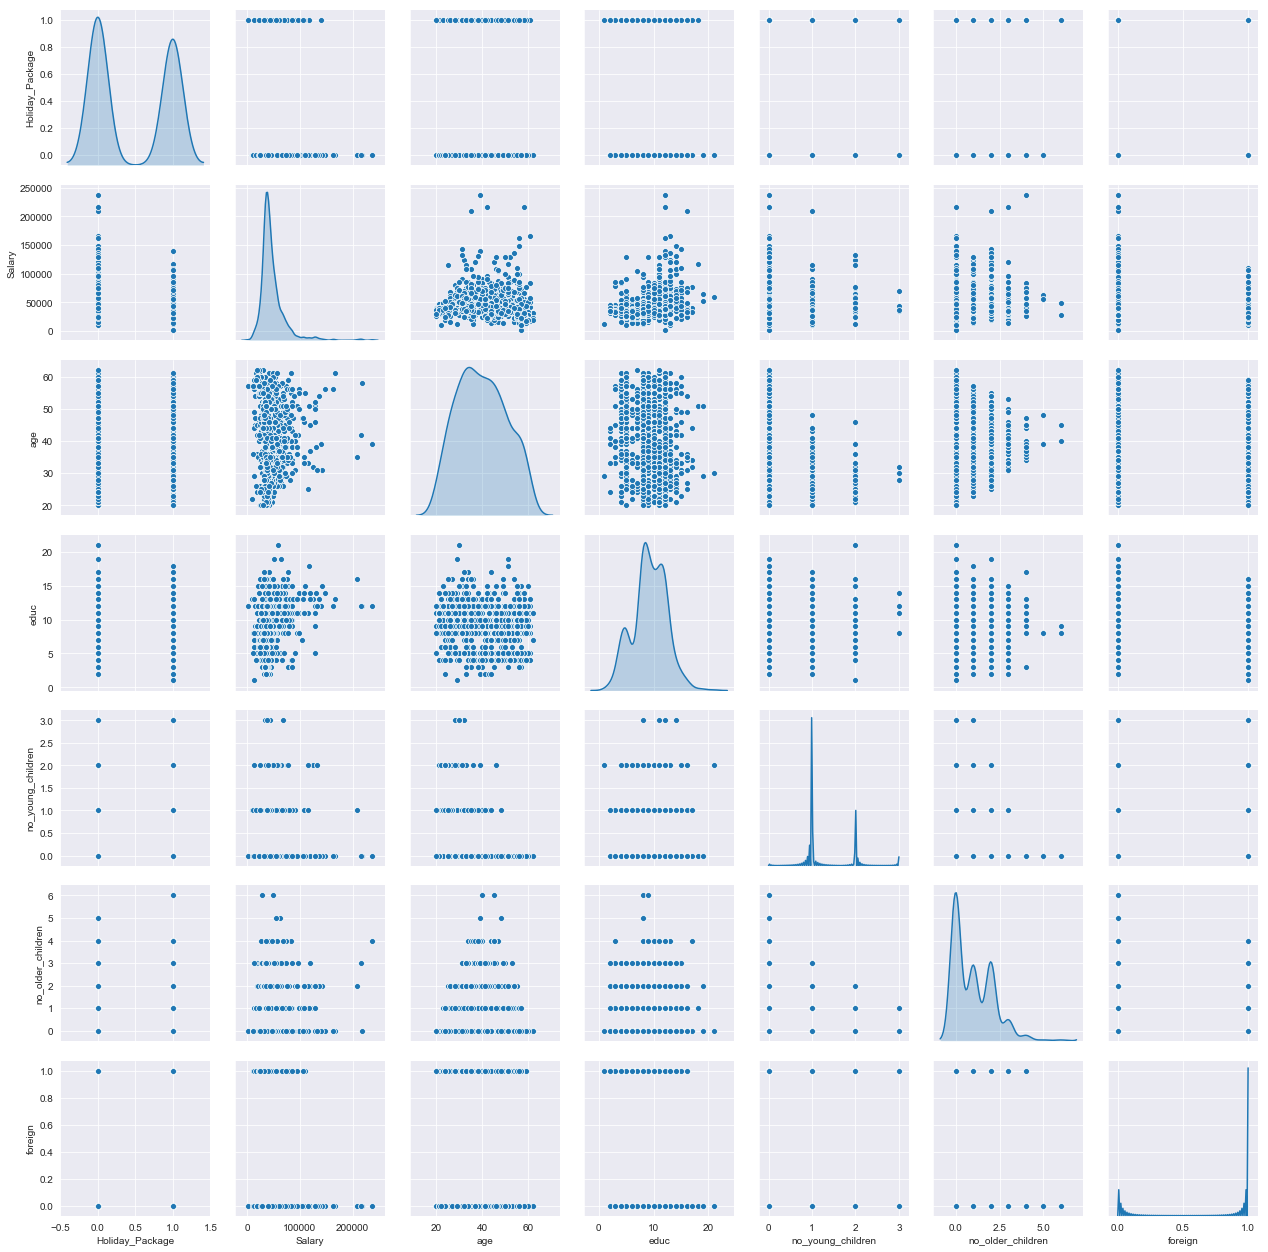

In [198]:
df = df_hp.iloc[:,:10]
sns.pairplot(df, diag_kind='kde')   # to plot density curve instead of histogram

In [199]:
df_hp.corr() 

,Holiday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
Holiday_Package,1.000000,-0.185694,-0.092311,-0.102552,-0.173115,0.080286,0.254096
Salary,-0.185694,1.000000,0.071709,0.326540,-0.029664,0.113772,-0.201043
age,-0.092311,0.071709,1.000000,-0.149294,-0.519093,-0.116205,-0.107148
educ,-0.102552,0.326540,-0.149294,1.000000,0.098350,-0.036321,-0.419678
no_young_children,-0.173115,-0.029664,-0.519093,0.098350,1.000000,-0.238428,0.085111
no_older_children,0.080286,0.113772,-0.116205,-0.036321,-0.238428,1.000000,0.021317
foreign,0.254096,-0.201043,-0.107148,-0.419678,0.085111,0.021317,1.000000


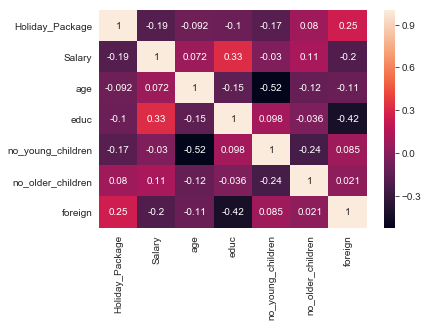

In [200]:
sns.heatmap(df_hp.corr(), annot=True)  # plot the correlation coefficients as a heatmap

In [201]:
df_hp.describe().T

,count,mean,std,min,25%,50%,75%,max
Holiday_Package,872.0,0.459862,0.498672,0.0,0.0,0.0,1.0,1.0
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign,872.0,0.247706,0.431928,0.0,0.0,0.0,0.0,1.0


### Outlier Checks

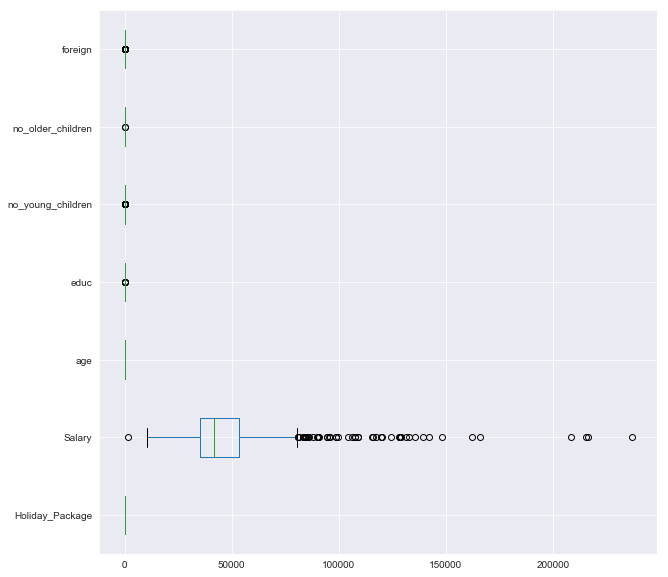

In [202]:
plt.figure(figsize=(10,10))
df_hp.boxplot(vert=0)

#### Although outliers exists as per the boxplot, by looking at the data distribution in describe(), the values are not too far away. Treating the outliers by converting them to min/max values will cause most variables to have values to be the same. So, outliers are not treated in this case

### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [205]:
#capture the dependent column into separate vectors for training set and test set
copy_df_hp = df_hp.copy(deep=True)

X = copy_df_hp.drop("Holiday_Package" , axis=1)

y = copy_df_hp.pop("Holiday_Package")


In [206]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [207]:
X_train.head()

,Salary,age,educ,no_young_children,no_older_children,foreign
502,34017,57,5,0,0,0
729,32197,22,6,1,0,1
604,132984,31,12,2,0,0
246,72394,50,14,0,1,0
494,28596,49,15,0,0,0


In [208]:
Y_train.head()

502    0
729    1
604    0
246    0
494    1
Name: Holiday_Package, dtype: int8

In [209]:
X_test.head()

,Salary,age,educ,no_young_children,no_older_children,foreign
523,74580,29,13,1,0,0
731,36564,47,5,0,1,1
180,40635,24,8,2,0,0
185,124627,32,13,2,1,0
435,28158,40,9,0,6,0


In [210]:
Y_test.head()

523    1
731    0
180    0
185    0
435    1
Name: Holiday_Package, dtype: int8

#### Now since the data has been split in the 70:30 (train:test) ratio, let us check the distribution of Ones and Zeroes in the Y ('Holiday_Package') variable.

In [211]:
Y_train.value_counts(normalize=True)

0    0.534426
1    0.465574
Name: Holiday_Package, dtype: float64

In [212]:
Y_test.value_counts(normalize=True)

0    0.553435
1    0.446565
Name: Holiday_Package, dtype: float64

#### From the above two code snippets, we can see that the proportion of Ones and Zeroes in the training and test set is the same as the proportion of Ones and Zeroes that were present in the whole dataset.

### Linear Discriminant Analysis (LDA):

In [213]:
lda = LinearDiscriminantAnalysis()
model=lda.fit(X_train,Y_train)

ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

### Logistic Regression Model: 

In [214]:
import statsmodels.api as sm
from statsmodels.formula.api import logit

train_data, test_data = train_test_split(df_hp, test_size=.30, random_state=1)


formula = ('Holiday_Package ~ Salary + age + educ + no_young_children + foreign')
model = logit(formula=formula, data = train_data).fit()

Optimization terminated successfully.
         Current function value: 0.589545
         Iterations 6


In [215]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Holiday_Package   No. Observations:                  610
Model:                          Logit   Df Residuals:                      604
Method:                           MLE   Df Model:                            5
Date:                Sun, 05 Jul 2020   Pseudo R-squ.:                  0.1465
Time:                        22:48:22   Log-Likelihood:                -359.62
converged:                       True   LL-Null:                       -421.37
Covariance Type:            nonrobust   LLR p-value:                 5.687e-25
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.0997      0.638      3.290      0.001       0.849       3.351
Salary            -1.804e-05   5.37e-06     -3.361      0.001   -2.86e-05   -7.52e-06
age                  -0.0522      0.010     -5.015      0.000      -0.073      -0.032
educ                  0.0805      0.036      2.220      0.026       0.009       0.152
no_young_children    -1.4973      0.212     -7.068      0.000      -1.913      -1.082
foreign               1.5899      0.258      6.166      0.000       1.085       2.095
=====================================================================================
"""

### Inference:
- The coefficient table showed that all attributes except one i.e. (no_older_children)  has significant influence (p-values < 0.05) on Holiday_Package. The coefficients are in log-odds terms. The interpretation of the model coefficients could be as follows:

- Each one-unit change in foreign will increase the log odds of opting Holiday_Package by 1.5879, and its p-value indicates that it is significant in determining the opting of Holiday_Package. Similarly, with each unit increase in educ increases the log odds of opting Holiday_Package by 0.0781 and p-value is significant too.
- The interpretation of coefficients in the log-odds term does not make much sense if it needs to report it in any article or publication. That is why the concept of odds ratio was introduced.

### ODDs Ratio

The ODDS is the ratio of the probability of an event occurring to the event not occurring. When we take a ratio of two such odds it called Odds Ratio.

In [216]:
#Odds ratio table
print(np.exp(model.params))

Intercept            8.164017
Salary               0.999982
age                  0.949094
educ                 1.083855
no_young_children    0.223725
foreign              4.903171
dtype: float64


### Inference: 
- In the above ODDS ratio table, you can observe that foreign has an ODDS Ratio of 4.8933, which indicates that one unit increase in no. of foreigners increases the odds of opting Holiday_Package  by 4.8933 times.
- Even though the interpretation of ODDS ratio is far better than log-odds interpretation, still it is not as intuitive as linear regression coefficients; where one can directly interpret that how much a dependent variable will change if making one unit change in the independent variable, keeping all other variables constant. 

### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

### Linear Discriminant Analysis (LDA):

In [217]:
#checking the classification accuracy

#Train
Train_score = accuracy_score(Y_train,ypred_train)
print('Accuracy Score for Train set is ',Train_score)

#Test
Test_score = accuracy_score(Y_test,ypred_test)
print('Accuracy Score for Test set is ',Test_score)


Accuracy Score for Train set is  0.6721311475409836
Accuracy Score for Test set is  0.6412213740458015


#### Accuracy score is the percentage of accuracy of the predictions made by the model. For our LDA model the accuracy score is 0.64, which is considerably quite accurate. But the more the accuracy score the efficient is you prediction model.

#### Model evaluation on test data set

In [218]:
#Confusion Matrix
print('Confusion Matrix','\n',metrics.confusion_matrix(Y_test,ypred_test),'\n')

#Classification Report
print('Classification Report','\n',metrics.classification_report(Y_test,ypred_test))

Confusion Matrix 
 [[103  42]
 [ 52  65]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



#### Observations:
- True positive: 65 (We predicted a positive result and it was positive)
- True negative: 103 (We predicted a negative result and it was negative)
- False positive: 42 (We predicted a positive result and it was negative)
- False negative: 52 (We predicted a negative result and it was positive)

In the output, 103 and 65 are actual predictions, and 42 and 52 are incorrect predictions.

Recall:  This Linear Discriminant Analysis model can identify the employees who will opt for the Holiday package 56% of the time.

### Logistic Regression Model:

The target variable has only two possible outcomes such as Yes or No.

#### Model evaluation on test data set

In [219]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Compute prediction
prediction = model.predict(exog = test_data)

# Define the cutoff
cutoff = 0.5

# Compute class predictions: y_prediction
y_prediction = np.where(prediction > cutoff, 1, 0)

# Assign actual class labels from the test sample to y_actual
y_actual = test_data["Holiday_Package"]

# Compute and print confusion matrix using crosstab function
conf_matrix = pd.crosstab(y_actual, y_prediction,
                       rownames = ["Actual"], 
                       colnames = ["Predicted"], 
                       margins = True)
                      
# Print the confusion matrix
print(conf_matrix)

Predicted    0    1  All
Actual                  
0          101   44  145
1           50   67  117
All        151  111  262


#### Observations:
- True positive: 67 (We predicted a positive result and it was positive)
- True negative: 101 (We predicted a negative result and it was negative)
- False positive: 44 (We predicted a positive result and it was negative)
- False negative: 50 (We predicted a negative result and it was positive)

In the output, 101 and 67 are actual predictions, and 44 and 50 are incorrect predictions.

Recall:  This Logistic Regression model can identify the employees who will opt for the Holiday package 57% of the time.

#### Classification accuracy

In [220]:
accuracy = accuracy_score(y_actual, y_prediction)

print('Accuracy: %.2f' % accuracy + "%")

Accuracy: 0.64%


#### Accuracy score is the percentage of accuracy of the predictions made by the model. For our Binary Logistic Regression model the accuracy score is 0.64, which is considerably quite accurate. But the more the accuracy score the efficient is you prediction model.

#### Classification report

In [221]:
print(classification_report(y_actual, y_prediction))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68       145
           1       0.60      0.57      0.59       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.64       262
weighted avg       0.64      0.64      0.64       262



#### Inference:
- The classification report revealed that the micro average of F1 score is about 0.63, which indicates that the trained model has a classification strength of 63%.

#### F1 Score

In [222]:
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_actual, y_prediction)))

F1 Score: 0.5877192982456141


#### ROC_AUC estimation

In [223]:
roc_auc = roc_auc_score(y_actual, y_prediction)
print('AUC: %.2f' % roc_auc + "%")

AUC: 0.63%


#### Reciever Operating Curve

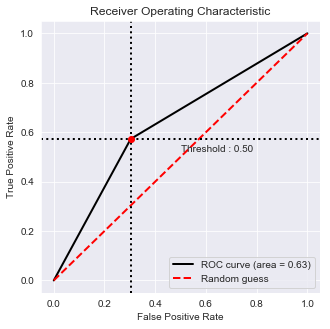

In [224]:
from plot_metric.functions import BinaryClassification

# Visualisation with plot_metric
bc = BinaryClassification(y_actual,
                          y_prediction,
                          labels = ["Class 1", "Class 2"])

# Figures
plt.figure(figsize = (5,5))
bc.plot_roc_curve()
plt.show()

### Comparison of Two Models (LDA and Logistic Regression )

AUC for Linear Discriminant Analysis Train Model is 0.7421152682968979
AUC for Logistic Regression Model Train Model is 0.742720124427547


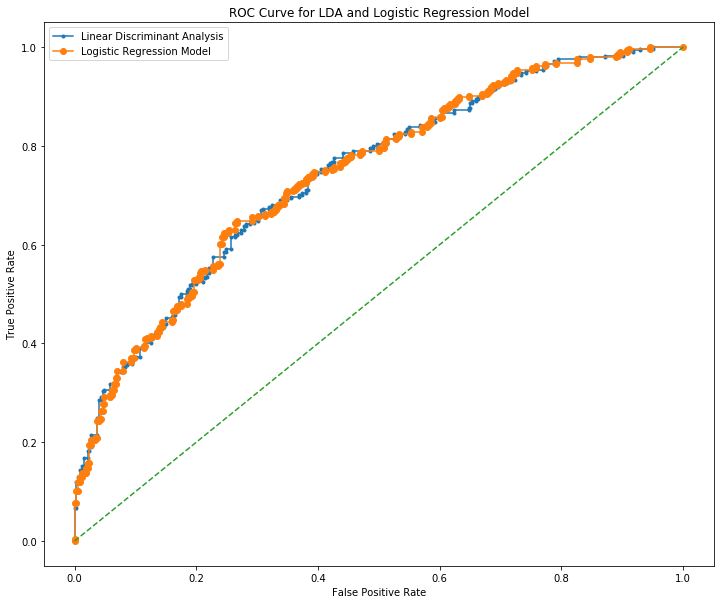

In [196]:
models_names={model:'Linear Discriminant Analysis',model1:'Logistic Regression Model'}

model_train_auc=roc_auc_score(Y_train,model.predict_proba(X_train)[:,1])
print('AUC for Linear Discriminant Analysis Train Model is',model_train_auc)
model1_train_auc=roc_auc_score(Y_train,model1.predict_proba(X_train)[:,1])
print('AUC for Logistic Regression Model Train Model is',model1_train_auc)


plt.figure(figsize=(12,10))
fpr_model, tpr_model, thresholds = roc_curve(Y_train, model.predict_proba(X_train)[:,1])
plt.plot(fpr_model, tpr_model, marker='.') 

fpr_model1, tpr_model1, thresholds = roc_curve(Y_train, model1.predict_proba(X_train)[:,1])
plt.plot(fpr_model1, tpr_model1, marker='o') 

plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('LDA and Logistic Regression Model'))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(models_names.values())
plt.show()

### 2.4 Inference: Basis on these predictions, what are the insights and recommendations.

### Inference:
- It appears that all models performed well for the majority class, with precision, recall metrics all above 0.7.
- Both models performance is almost the same for the minority class and arguably the “more important” classification of whether a customer was going to opt for the Holiday package or not.
- AUC for Linear Discriminant Analysis Train Model is 74.2%
- AUC for Logistic Regression Model Train Model is 74.27%

### Recommendations:
- From the above ODDS ratio table, you can observe that foreign has an ODDS Ratio of 4.8933, which indicates that one unit increase in no. of foreigners increases the odds of opting Holiday_Package by 4.8933 times.

- Salary has an ODDS Ratio of 0.99, which indicates that one unit increase in Salary increases the odds of opting Holiday_Package by 0.99 times.

- educ has an ODDS Ratio of 1.083, which indicates that one unit increase in education increases the odds of opting Holiday_Package by 1.083 times.

- no_young_children has an ODDS Ratio of 0.223, which indicates that one unit increase in no of young children increases the odds of opting Holiday_Package by 0.223 times.


## The END